In [1]:
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm

In [2]:
import os
download_path = os.path.join(os.path.expanduser("~"), "Downloads")
cricket_path = os.path.join(download_path, 'cricket')


filenames = []
for file in os.listdir(cricket_path):
    filenames.append(os.path.join(cricket_path, file))

In [3]:
filenames[0:5]

['C:\\Users\\VICTUS\\Downloads\\cricket\\1001349.yaml',
 'C:\\Users\\VICTUS\\Downloads\\cricket\\1001351.yaml',
 'C:\\Users\\VICTUS\\Downloads\\cricket\\1001353.yaml',
 'C:\\Users\\VICTUS\\Downloads\\cricket\\1004729.yaml',
 'C:\\Users\\VICTUS\\Downloads\\cricket\\1007655.yaml']

In [4]:
import pandas as pd
from ruamel.yaml import safe_load
from tqdm import tqdm

final_df = pd.DataFrame()  
counter = 0

for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = pd.concat([final_df, df], ignore_index=True) # Concatenate DataFrames
        counter += 1

final_df.reset_index(drop=True, inplace=True)  # Reset index of the concatenated DataFrame

100%|█████████████████████████████████████████████████████████████████████████████▉| 1432/1433 [08:10<00:00,  2.92it/s]


NotImplementedError: 

In [5]:
backup = final_df.copy()

In [6]:
final_df

innings  meta.data_version  \
0     [{'1st innings': {'team': 'Australia', 'delive...                0.9   
1     [{'1st innings': {'team': 'Australia', 'delive...                0.9   
2     [{'1st innings': {'team': 'Australia', 'delive...                0.9   
3     [{'1st innings': {'team': 'Hong Kong', 'delive...                0.9   
4     [{'1st innings': {'team': 'Zimbabwe', 'deliver...                0.9   
...                                                 ...                ...   
1427  [{'1st innings': {'team': 'Sri Lanka', 'delive...                0.9   
1428  [{'1st innings': {'team': 'Bangladesh', 'deliv...                0.9   
1429  [{'1st innings': {'team': 'Netherlands', 'deli...                0.9   
1430  [{'1st innings': {'team': 'Australia', 'delive...                0.9   
1431  [{'1st innings': {'team': 'Sri Lanka', 'delive...                0.9   

     meta.created  meta.revision    info.dates info.gender info.match_type  \
0      2017-02-18              2  [2017-02-17]        male             T20   
1      2017-02-19              2  [2017-02-19]        male             T20   
2      2017-02-23              1  [2017-02-22]        male             T20   
3      2016-09-12              1  [2016-09-05]        male             T20   
4      2016-06-19              1  [2016-06-18]        male             T20   
...           ...            ...           ...         ...             ...   
1427   2016-03-05              2  [2016-03-04]        male             T20   
1428   2016-03-08              1  [2016-03-06]        male             T20   
1429   2016-02-03              1  [2016-02-03]        male             T20   
1430   2016-09-12              1  [2016-09-06]        male             T20   
1431   2016-09-12              1  [2016-09-09]        male             T20   

      info.outcome.by.wickets info.outcome.winner  info.overs  ...  \
0                         5.0           Sri Lanka          20  ...   
1                         2.0           Sri Lanka          20  ...   
2                         NaN           Australia          20  ...   
3                         NaN           Hong Kong          20  ...   
4                         NaN            Zimbabwe          20  ...   
...                       ...                 ...         ...  ...   
1427                      6.0            Pakistan          20  ...   
1428                      8.0               India          20  ...   
1429                      NaN         Netherlands          20  ...   
1430                      NaN           Australia          20  ...   
1431                      4.0           Australia          20  ...   

     info.outcome.by.runs info.match_type_number info.neutral_venue  \
0                     NaN                    NaN                NaN   
1                     NaN                    NaN                NaN   
2                    41.0                    NaN                NaN   
3                    40.0                    NaN                NaN   
4                     2.0                    NaN                NaN   
...                   ...                    ...                ...   
1427                  NaN                    NaN                1.0   
1428                  NaN                    NaN                NaN   
1429                 84.0                    NaN                NaN   
1430                 85.0                    NaN                NaN   
1431                  NaN                    NaN                NaN   

     info.outcome.method info.outcome.result info.outcome.eliminator  \
0                    NaN                 NaN                     NaN   
1                    NaN                 NaN                     NaN   
2                    NaN                 NaN                     NaN   
3                    NaN                 NaN                     NaN   
4                    NaN                 NaN                     NaN   
...                  ...                 ...    

In [7]:
final_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets'
],inplace=True)

In [8]:
final_df

innings    info.dates  \
0     [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-17]   
1     [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-19]   
2     [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-22]   
3     [{'1st innings': {'team': 'Hong Kong', 'delive...  [2016-09-05]   
4     [{'1st innings': {'team': 'Zimbabwe', 'deliver...  [2016-06-18]   
...                                                 ...           ...   
1427  [{'1st innings': {'team': 'Sri Lanka', 'delive...  [2016-03-04]   
1428  [{'1st innings': {'team': 'Bangladesh', 'deliv...  [2016-03-06]   
1429  [{'1st innings': {'team': 'Netherlands', 'deli...  [2016-02-03]   
1430  [{'1st innings': {'team': 'Australia', 'delive...  [2016-09-06]   
1431  [{'1st innings': {'team': 'Sri Lanka', 'delive...  [2016-09-09]   

     info.gender info.match_type info.outcome.winner  info.overs  \
0           male             T20           Sri Lanka          20   
1           male             T20           Sri Lanka          20   
2           male             T20           Australia          20   
3           male             T20           Hong Kong          20   
4           male             T20            Zimbabwe          20   
...          ...             ...                 ...         ...   
1427        male             T20            Pakistan          20   
1428        male             T20               India          20   
1429        male             T20         Netherlands          20   
1430        male             T20           Australia          20   
1431        male             T20           Australia          20   

     info.player_of_match                           info.teams  \
0         [DAS Gunaratne]               [Australia, Sri Lanka]   
1         [DAS Gunaratne]               [Australia, Sri Lanka]   
2               [A Zampa]               [Australia, Sri Lanka]   
3                     NaN                 [Ireland, Hong Kong]   
4          [E Chigumbura]                    [Zimbabwe, India]   
...                   ...                                  ...   
1427         [Umar Akmal]                [Pakistan, Sri Lanka]   
1428           [S Dhawan]                  [Bangladesh, India]   
1429   [Mudassar Bukhari]  [United Arab Emirates, Netherlands]   
1430         [GJ Maxwell]               [Sri Lanka, Australia]   
1431         [GJ Maxwell]               [Sri Lanka, Australia]   

     info.toss.decision      info.toss.winner  \
0                 field             Sri Lanka   
1                 field             Sri Lanka   
2                 field             Sri Lanka   
3                   bat             Hong Kong   
4                 field                 India   
...                 ...                   ...   
1427              field              Pakistan   
1428              field                 India   
1429              field  United Arab Emirates   
1430              field             Sri Lanka   
1431                bat             Sri Lanka   

                            info.umpires  \
0                 [MD Martell, P Wilson]   
1                  [SD Fry, SJ Nogajski]   
2                 [MD Martell, P Wilson]   
3                    [R Black, AJ Neill]   
4               [TJ Matibiri, RB Tiffin]   
...                                  ...   
1427        [AK Chaudhary, Enamul Haque]   
1428    [RSA Palliyaguruge, Shozab Raza]   
1429          [CK Nandan, Sarika Prasad]   
1430      [REJ Martinesz, RR Wimalasiri]   
1431  [REJ Martinesz, RSA Palliyaguruge]   

                                   info.venue  match_id    info.city  
0                    Melbourne Cricket Ground         0          NaN  
1              Simonds Stadium, South Geelong         1     Victoria  
2                               Adelaide Oval         2          NaN  
3           Bready Cricket Club, Magheramason         3  Londonderry  
4                          Harare Sports Club         4          NaN  
...              

In [9]:
final_df.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {1.1: {'batsman': 'M Klinger',
   'bowler': 'KMDN Kulasekara',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 

In [10]:
import pandas as pd

count = 1
dfs = []  

for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count += 1
        continue

    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []

    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')

    loop_df = pd.DataFrame({
            'match_id': match_id,
            'teams': teams,
            'batting_team': batting_team,
            'ball': ball_of_match,
            'batsman': batsman,
            'bowler': bowler,
            'runs': runs,
            'player_dismissed': player_of_dismissed,
            'city': city,
            'venue': venue
        })
    
    dfs.append(loop_df)  

    count += 1

delivery_df = pd.concat(dfs, ignore_index=True)


In [11]:
delivery_df

match_id                   teams batting_team  ball          batsman  \
0              1  [Australia, Sri Lanka]    Australia   0.1         AJ Finch   
1              1  [Australia, Sri Lanka]    Australia   0.2         AJ Finch   
2              1  [Australia, Sri Lanka]    Australia   0.3         AJ Finch   
3              1  [Australia, Sri Lanka]    Australia   0.4        M Klinger   
4              1  [Australia, Sri Lanka]    Australia   0.5        M Klinger   
...          ...                     ...          ...   ...              ...   
172522      1432  [Sri Lanka, Australia]    Sri Lanka  19.3  SMSM Senanayake   
172523      1432  [Sri Lanka, Australia]    Sri Lanka  19.4      DM de Silva   
172524      1432  [Sri Lanka, Australia]    Sri Lanka  19.5      DM de Silva   
172525      1432  [Sri Lanka, Australia]    Sri Lanka  19.6  SMSM Senanayake   
172526      1432  [Sri Lanka, Australia]    Sri Lanka  19.7  SMSM Senanayake   

            bowler  runs player_dismissed     city                     venue  
0       SL Malinga     0                0      NaN  Melbourne Cricket Ground  
1       SL Malinga     0                0      NaN  Melbourne Cricket Ground  
2       SL Malinga     1                0      NaN  Melbourne Cricket Ground  
3       SL Malinga     2                0      NaN  Melbourne Cricket Ground  
4       SL Malinga     0                0      NaN  Melbourne Cricket Ground  
...            ...   ...              ...      ...                       ...  
172522    MA Starc     1                0  Colombo       R Premadasa Stadium  
172523    MA Starc     0                0  Colombo       R Premadasa Stadium  
172524    MA Starc     0      DM de Silva  Colombo       R Premadasa Stadium  
172525    MA Starc     2                0  Colombo       R Premadasa Stadium  
172526    MA Starc     1                0  Colombo       R Premadasa Stadium  

[172527 rows x 10 columns]

In [12]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [13]:
delivery_df['bowling_team'] = delivery_df.apply(bowl,axis=1)

In [18]:
delivery_df

match_id                   teams batting_team  ball          batsman  \
0              1  [Australia, Sri Lanka]    Australia   0.1         AJ Finch   
1              1  [Australia, Sri Lanka]    Australia   0.2         AJ Finch   
2              1  [Australia, Sri Lanka]    Australia   0.3         AJ Finch   
3              1  [Australia, Sri Lanka]    Australia   0.4        M Klinger   
4              1  [Australia, Sri Lanka]    Australia   0.5        M Klinger   
...          ...                     ...          ...   ...              ...   
172522      1432  [Sri Lanka, Australia]    Sri Lanka  19.3  SMSM Senanayake   
172523      1432  [Sri Lanka, Australia]    Sri Lanka  19.4      DM de Silva   
172524      1432  [Sri Lanka, Australia]    Sri Lanka  19.5      DM de Silva   
172525      1432  [Sri Lanka, Australia]    Sri Lanka  19.6  SMSM Senanayake   
172526      1432  [Sri Lanka, Australia]    Sri Lanka  19.7  SMSM Senanayake   

            bowler  runs player_dismissed     city                     venue  \
0       SL Malinga     0                0      NaN  Melbourne Cricket Ground   
1       SL Malinga     0                0      NaN  Melbourne Cricket Ground   
2       SL Malinga     1                0      NaN  Melbourne Cricket Ground   
3       SL Malinga     2                0      NaN  Melbourne Cricket Ground   
4       SL Malinga     0                0      NaN  Melbourne Cricket Ground   
...            ...   ...              ...      ...                       ...   
172522    MA Starc     1                0  Colombo       R Premadasa Stadium   
172523    MA Starc     0                0  Colombo       R Premadasa Stadium   
172524    MA Starc     0      DM de Silva  Colombo       R Premadasa Stadium   
172525    MA Starc     2                0  Colombo       R Premadasa Stadium   
172526    MA Starc     1                0  Colombo       R Premadasa Stadium   

       bowling_team  
0         Sri Lanka  
1         Sri Lanka  
2         Sri Lanka  
3         Sri Lanka  
4         Sri Lanka  
...             ...  
172522    Australia  
172523    Australia  
172524    Australia  
172525    Australia  
172526    Australia  

[172527 rows x 11 columns]

In [19]:
delivery_df.drop(columns=['teams'],inplace=True)

In [20]:
delivery_df['batting_team'].unique()

array(['Australia', 'Hong Kong', 'Zimbabwe', 'India', 'Bangladesh',
       'New Zealand', 'South Africa', 'England', 'West Indies', 'Ireland',
       'Afghanistan', 'Sri Lanka', 'Pakistan', 'United Arab Emirates',
       'Scotland', 'Oman', 'Papua New Guinea', 'Netherlands', 'Thailand',
       'Uganda', 'Malaysia', 'Botswana', 'Malawi', 'Sierra Leone',
       'Mozambique', 'Lesotho', 'Nepal', 'China', 'Kuwait', 'Vanuatu',
       'Philippines', 'United States of America', 'Germany', 'Namibia',
       'Nigeria', 'Tanzania', 'Japan', 'Indonesia', 'Fiji', 'Samoa',
       'Ghana', 'Kenya', 'Guernsey', 'Denmark', 'Jersey', 'Italy',
       'Norway', 'Maldives', 'Mali', 'Singapore', 'Bermuda', 'Canada',
       'Cayman Islands', 'Portugal', 'Gibraltar', 'Spain', 'Bhutan',
       'Qatar', 'Iran', 'Austria', 'Belgium', 'Isle of Man', 'Bulgaria',
       'Romania'], dtype=object)

In [14]:
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'    
]

In [15]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [16]:
delivery_df

match_id                   teams batting_team  ball          batsman  \
0              1  [Australia, Sri Lanka]    Australia   0.1         AJ Finch   
1              1  [Australia, Sri Lanka]    Australia   0.2         AJ Finch   
2              1  [Australia, Sri Lanka]    Australia   0.3         AJ Finch   
3              1  [Australia, Sri Lanka]    Australia   0.4        M Klinger   
4              1  [Australia, Sri Lanka]    Australia   0.5        M Klinger   
...          ...                     ...          ...   ...              ...   
172522      1432  [Sri Lanka, Australia]    Sri Lanka  19.3  SMSM Senanayake   
172523      1432  [Sri Lanka, Australia]    Sri Lanka  19.4      DM de Silva   
172524      1432  [Sri Lanka, Australia]    Sri Lanka  19.5      DM de Silva   
172525      1432  [Sri Lanka, Australia]    Sri Lanka  19.6  SMSM Senanayake   
172526      1432  [Sri Lanka, Australia]    Sri Lanka  19.7  SMSM Senanayake   

            bowler  runs player_dismissed     city                     venue  \
0       SL Malinga     0                0      NaN  Melbourne Cricket Ground   
1       SL Malinga     0                0      NaN  Melbourne Cricket Ground   
2       SL Malinga     1                0      NaN  Melbourne Cricket Ground   
3       SL Malinga     2                0      NaN  Melbourne Cricket Ground   
4       SL Malinga     0                0      NaN  Melbourne Cricket Ground   
...            ...   ...              ...      ...                       ...   
172522    MA Starc     1                0  Colombo       R Premadasa Stadium   
172523    MA Starc     0                0  Colombo       R Premadasa Stadium   
172524    MA Starc     0      DM de Silva  Colombo       R Premadasa Stadium   
172525    MA Starc     2                0  Colombo       R Premadasa Stadium   
172526    MA Starc     1                0  Colombo       R Premadasa Stadium   

       bowling_team  
0         Sri Lanka  
1         Sri Lanka  
2         Sri Lanka  
3         Sri Lanka  
4         Sri Lanka  
...             ...  
172522    Australia  
172523    Australia  
172524    Australia  
172525    Australia  
172526    Australia  

[99585 rows x 11 columns]

In [17]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [18]:
output

match_id batting_team bowling_team  ball  runs player_dismissed  \
0              1    Australia    Sri Lanka   0.1     0                0   
1              1    Australia    Sri Lanka   0.2     0                0   
2              1    Australia    Sri Lanka   0.3     1                0   
3              1    Australia    Sri Lanka   0.4     2                0   
4              1    Australia    Sri Lanka   0.5     0                0   
...          ...          ...          ...   ...   ...              ...   
172522      1432    Sri Lanka    Australia  19.3     1                0   
172523      1432    Sri Lanka    Australia  19.4     0                0   
172524      1432    Sri Lanka    Australia  19.5     0      DM de Silva   
172525      1432    Sri Lanka    Australia  19.6     2                0   
172526      1432    Sri Lanka    Australia  19.7     1                0   

           city                     venue  
0           NaN  Melbourne Cricket Ground  
1           NaN  Melbourne Cricket Ground  
2           NaN  Melbourne Cricket Ground  
3           NaN  Melbourne Cricket Ground  
4           NaN  Melbourne Cricket Ground  
...         ...                       ...  
172522  Colombo       R Premadasa Stadium  
172523  Colombo       R Premadasa Stadium  
172524  Colombo       R Premadasa Stadium  
172525  Colombo       R Premadasa Stadium  
172526  Colombo       R Premadasa Stadium  

[99585 rows x 8 columns]

In [19]:
x = np.where(output['city'].isnull(), output['venue'].str.split().apply(lambda x:x[0]), output['city'])

In [20]:
output['city'] = x

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_14648\2208188131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['city'] = x


In [21]:
output.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [22]:
output.drop(columns=['venue'],inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_14648\2962604362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.drop(columns=['venue'],inplace=True)


In [23]:
output

match_id batting_team bowling_team  ball  runs player_dismissed  \
0              1    Australia    Sri Lanka   0.1     0                0   
1              1    Australia    Sri Lanka   0.2     0                0   
2              1    Australia    Sri Lanka   0.3     1                0   
3              1    Australia    Sri Lanka   0.4     2                0   
4              1    Australia    Sri Lanka   0.5     0                0   
...          ...          ...          ...   ...   ...              ...   
172522      1432    Sri Lanka    Australia  19.3     1                0   
172523      1432    Sri Lanka    Australia  19.4     0                0   
172524      1432    Sri Lanka    Australia  19.5     0      DM de Silva   
172525      1432    Sri Lanka    Australia  19.6     2                0   
172526      1432    Sri Lanka    Australia  19.7     1                0   

             city  
0       Melbourne  
1       Melbourne  
2       Melbourne  
3       Melbourne  
4       Melbourne  
...           ...  
172522    Colombo  
172523    Colombo  
172524    Colombo  
172525    Colombo  
172526    Colombo  

[99585 rows x 7 columns]

In [24]:
total_df = output.groupby('match_id').sum()['runs'].reset_index()
output = output.merge(total_df,on='match_id')

In [25]:
output

match_id batting_team bowling_team  ball  runs_x player_dismissed  \
0             1    Australia    Sri Lanka   0.1       0                0   
1             1    Australia    Sri Lanka   0.2       0                0   
2             1    Australia    Sri Lanka   0.3       1                0   
3             1    Australia    Sri Lanka   0.4       2                0   
4             1    Australia    Sri Lanka   0.5       0                0   
...         ...          ...          ...   ...     ...              ...   
99580      1432    Sri Lanka    Australia  19.3       1                0   
99581      1432    Sri Lanka    Australia  19.4       0                0   
99582      1432    Sri Lanka    Australia  19.5       0      DM de Silva   
99583      1432    Sri Lanka    Australia  19.6       2                0   
99584      1432    Sri Lanka    Australia  19.7       1                0   

            city  runs_y  
0      Melbourne     168  
1      Melbourne     168  
2      Melbourne     168  
3      Melbourne     168  
4      Melbourne     168  
...          ...     ...  
99580    Colombo     128  
99581    Colombo     128  
99582    Colombo     128  
99583    Colombo     128  
99584    Colombo     128  

[99585 rows x 8 columns]

In [26]:
output['runs_x'] = pd.to_numeric(output['runs_x'], errors='coerce')
output['current_score'] = output.groupby('match_id')['runs_x'].cumsum()


In [27]:
output['over'] = output['ball'].apply(lambda x:str(x).split(".")[0])
output['ball_no'] = output['ball'].apply(lambda x:str(x).split(".")[1])

In [28]:
output['balls_bowled'] = (output['over'].astype('int')*6) + output['ball_no'].astype('int')

In [29]:
output['crr'] = round((output['current_score']*6)/output['balls_bowled'],2)

In [30]:
output['player_dismissed'] = output['player_dismissed'].apply(lambda x: 0 if x == '0' else 1).astype(int)
output['player_dismissed_cumsum'] = output.groupby('match_id')['player_dismissed'].cumsum()
output['wickets_left'] = 10 - output['player_dismissed_cumsum']


In [31]:
final_df = output[['match_id','batting_team','bowling_team','runs_x','current_score','balls_bowled','wickets_left','crr','city','runs_y']]

In [32]:
final_df

match_id batting_team bowling_team  runs_x  current_score  \
0             1    Australia    Sri Lanka       0              0   
1             1    Australia    Sri Lanka       0              0   
2             1    Australia    Sri Lanka       1              1   
3             1    Australia    Sri Lanka       2              3   
4             1    Australia    Sri Lanka       0              3   
...         ...          ...          ...     ...            ...   
99580      1432    Sri Lanka    Australia       1            125   
99581      1432    Sri Lanka    Australia       0            125   
99582      1432    Sri Lanka    Australia       0            125   
99583      1432    Sri Lanka    Australia       2            127   
99584      1432    Sri Lanka    Australia       1            128   

       balls_bowled  wickets_left   crr       city  runs_y  
0                 1            10  0.00  Melbourne     168  
1                 2            10  0.00  Melbourne     168  
2                 3            10  2.00  Melbourne     168  
3                 4            10  4.50  Melbourne     168  
4                 5            10  3.60  Melbourne     168  
...             ...           ...   ...        ...     ...  
99580           117             2  6.41    Colombo     128  
99581           118             2  6.36    Colombo     128  
99582           119             1  6.30    Colombo     128  
99583           120             1  6.35    Colombo     128  
99584           121             1  6.35    Colombo     128  

[99585 rows x 10 columns]

In [33]:
final_df = final_df.sample(final_df.shape[0])

In [34]:
final_df['balls_left'] = 120 - final_df['balls_bowled']
final_df['balls_left'] = final_df['balls_left'].apply(lambda x:0 if x<0 else x)

In [35]:
final_df['crr'] = round((final_df['current_score']*6)/final_df['balls_bowled'],2)

In [36]:
final_df

match_id  batting_team  bowling_team  runs_x  current_score  \
48270       834     Sri Lanka   West Indies       0             42   
25907       351     Australia    Bangladesh       0             20   
9539        107         India  South Africa       1            129   
72832      1087       England     Australia       1            138   
56024       905      Pakistan     Australia       1            162   
...         ...           ...           ...     ...            ...   
60111       953  South Africa   New Zealand       1             35   
73699      1098       England      Pakistan       0            140   
98149      1395     Australia   West Indies       6            142   
7280         88       England         India       0            181   
11957       130     Sri Lanka    Bangladesh       1            118   

       balls_bowled  wickets_left    crr          city  runs_y  balls_left  
48270            27            10   9.33    Nottingham     192          93  
25907            14            10   8.57      Canberra     189         106  
9539            101             2   7.66  Johannesburg     133          19  
72832           113             7   7.33    Chelmsford     146           7  
56024           120             1   8.10    Birmingham     162           0  
...             ...           ...    ...           ...     ...         ...  
60111            30             8   7.00    Wellington     147          90  
73699           116             5   7.24  Loughborough     145           4  
98149           110             7   7.75       Kolkata     148          10  
7280            108             4  10.06       Bristol     198          12  
11957            68             9  10.41       Colombo     214          52  

[99585 rows x 11 columns]

In [37]:
final_df.drop(columns=['balls_bowled'],inplace=True)

In [38]:
groups = final_df.groupby('match_id')

In [39]:
final_df['runs_x'] = pd.to_numeric(final_df['runs_x'], errors='coerce')
groups = final_df.groupby('match_id')
last_five = []
for match_id in final_df['match_id'].unique():
    group = groups.get_group(match_id)
    rolling_sum = group['runs_x'].rolling(window=30, min_periods=1).sum()
    last_five.extend(rolling_sum.values.tolist())


In [40]:
final_df['last_five'] = last_five

In [41]:
final_df

match_id  batting_team  bowling_team  runs_x  current_score  \
48270       834     Sri Lanka   West Indies       0             42   
25907       351     Australia    Bangladesh       0             20   
9539        107         India  South Africa       1            129   
72832      1087       England     Australia       1            138   
56024       905      Pakistan     Australia       1            162   
...         ...           ...           ...     ...            ...   
60111       953  South Africa   New Zealand       1             35   
73699      1098       England      Pakistan       0            140   
98149      1395     Australia   West Indies       6            142   
7280         88       England         India       0            181   
11957       130     Sri Lanka    Bangladesh       1            118   

       wickets_left    crr          city  runs_y  balls_left  last_five  
48270            10   9.33    Nottingham     192          93        0.0  
25907            10   8.57      Canberra     189         106        6.0  
9539              2   7.66  Johannesburg     133          19        6.0  
72832             7   7.33    Chelmsford     146           7        6.0  
56024             1   8.10    Birmingham     162           0        7.0  
...             ...    ...           ...     ...         ...        ...  
60111             8   7.00    Wellington     147          90       32.0  
73699             5   7.24  Loughborough     145           4       34.0  
98149             7   7.75       Kolkata     148          10       35.0  
7280              4  10.06       Bristol     198          12       35.0  
11957             9  10.41       Colombo     214          52       41.0  

[99585 rows x 11 columns]

In [42]:
final_df.dropna(inplace=True)

In [43]:
final_df

match_id  batting_team  bowling_team  runs_x  current_score  \
48270       834     Sri Lanka   West Indies       0             42   
25907       351     Australia    Bangladesh       0             20   
9539        107         India  South Africa       1            129   
72832      1087       England     Australia       1            138   
56024       905      Pakistan     Australia       1            162   
...         ...           ...           ...     ...            ...   
60111       953  South Africa   New Zealand       1             35   
73699      1098       England      Pakistan       0            140   
98149      1395     Australia   West Indies       6            142   
7280         88       England         India       0            181   
11957       130     Sri Lanka    Bangladesh       1            118   

       wickets_left    crr          city  runs_y  balls_left  last_five  
48270            10   9.33    Nottingham     192          93        0.0  
25907            10   8.57      Canberra     189         106        6.0  
9539              2   7.66  Johannesburg     133          19        6.0  
72832             7   7.33    Chelmsford     146           7        6.0  
56024             1   8.10    Birmingham     162           0        7.0  
...             ...    ...           ...     ...         ...        ...  
60111             8   7.00    Wellington     147          90       32.0  
73699             5   7.24  Loughborough     145           4       34.0  
98149             7   7.75       Kolkata     148          10       35.0  
7280              4  10.06       Bristol     198          12       35.0  
11957             9  10.41       Colombo     214          52       41.0  

[99585 rows x 11 columns]

In [44]:
eligible_cities = final_df['city'].value_counts()[final_df['city'].value_counts() > 600].index.tolist()
final_df = final_df[final_df['city'].isin(eligible_cities)]

In [45]:
x = final_df.drop(columns=['match_id','runs_x','runs_y'])
y = final_df['runs_y']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

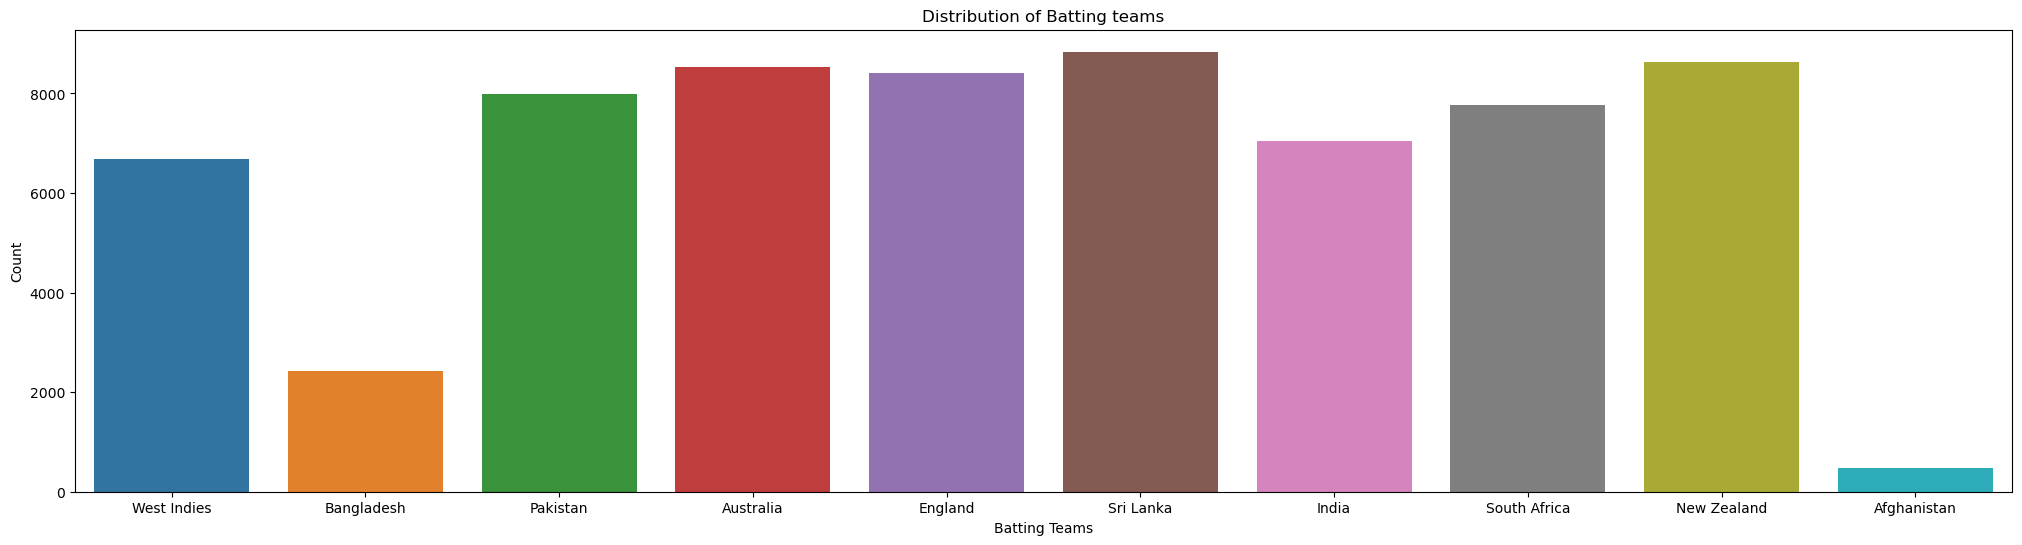

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 6))
sns.countplot(data=x_train, x='batting_team')
plt.xlabel('Batting Teams')
plt.ylabel('Count')
plt.title('Distribution of Batting teams')
plt.show()

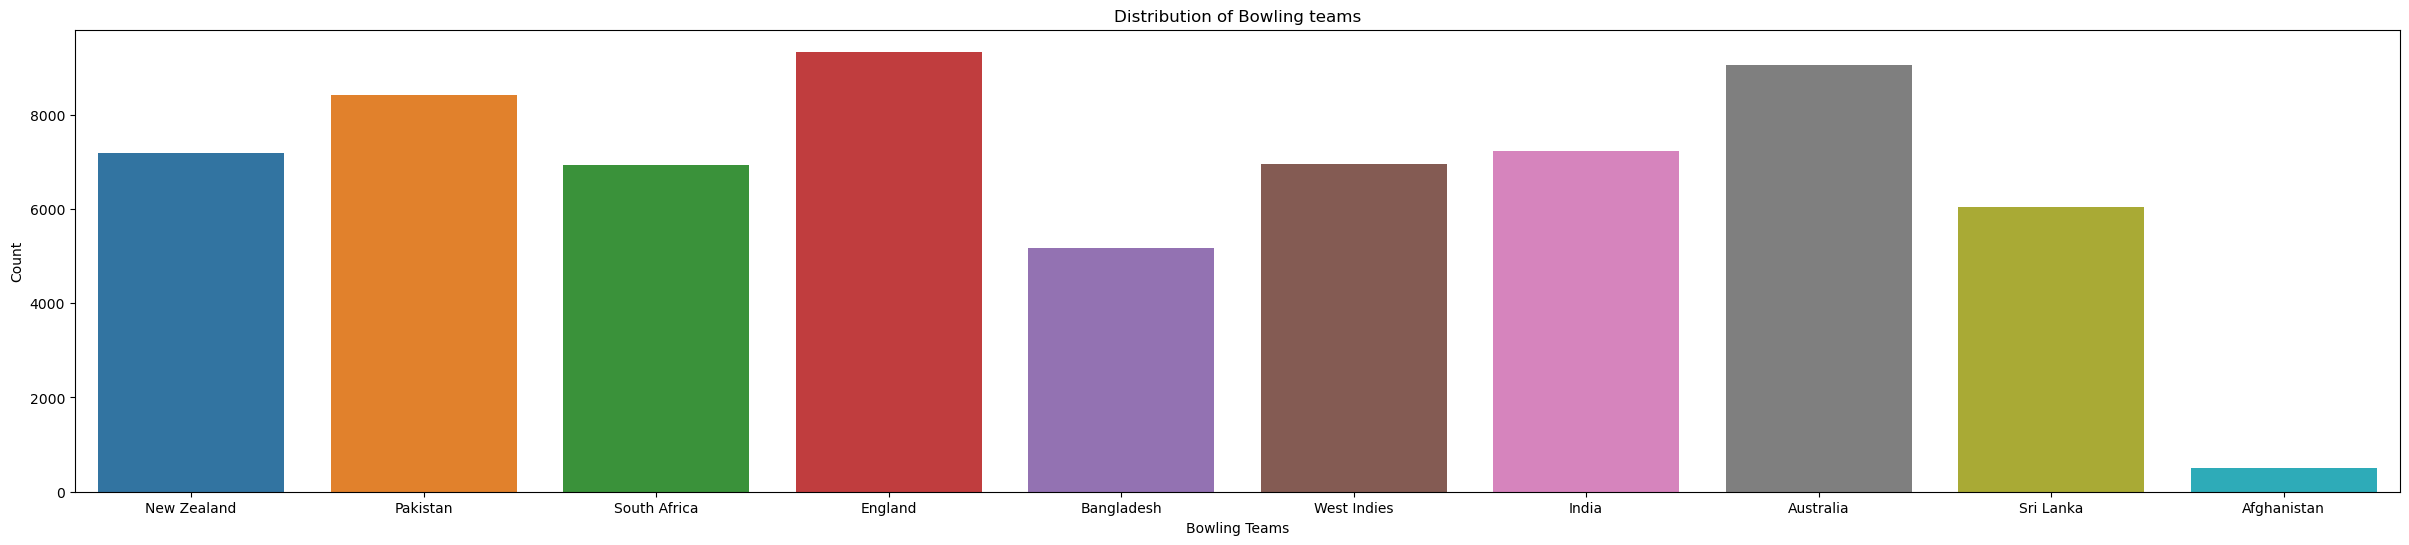

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 6))
sns.countplot(data=x_train, x='bowling_team')
plt.xlabel('Bowling Teams')
plt.ylabel('Count')
plt.title('Distribution of Bowling teams')
plt.show()

In [48]:
x_test

batting_team bowling_team  current_score  wickets_left    crr  \
98571        India   Bangladesh             44             7   5.39   
17650   Bangladesh      England              0            10   0.00   
33945    Sri Lanka  New Zealand            147             7   7.95   
63497  West Indies    Sri Lanka             16             9   3.20   
94463        India   Bangladesh              1            10   6.00   
...            ...          ...            ...           ...    ...   
58105     Pakistan  New Zealand              5            10  10.00   
37801      England     Pakistan            161             7   9.76   
3693   New Zealand    Australia            153             9  12.58   
93023  New Zealand        India             32             8   6.19   
41156      England     Pakistan             94             6   6.71   

               city  balls_left  last_five  
98571        Mirpur          71       52.0  
17650      St Lucia         119       47.0  
33945         Kandy           9       20.0  
63497     Pallekele          90       59.0  
94463     Bangalore         119       35.0  
...             ...         ...        ...  
58105      Auckland         117       47.0  
37801  Kuala Lumpur          21       39.0  
3693       Auckland          47       40.0  
93023        Nagpur          89       39.0  
41156       Bristol          36        2.0  

[16701 rows x 8 columns]

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [51]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [52]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9676081958641396
2.8302092851689387


In [53]:
teams

['Australia',
 'India',
 'Bangladesh',
 'New Zealand',
 'South Africa',
 'England',
 'West Indies',
 'Afghanistan',
 'Pakistan',
 'Sri Lanka']

In [55]:
import pickle 
pickle.dump(pipe,open('pipe.pkl','wb'))

In [56]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Melbourne',
 'Dubai',
 'Sydney',
 'St Lucia',
 'Auckland',
 'Cape Town',
 'London',
 'Sylhet',
 'Barbados',
 'Pallekele',
 'Wellington',
 'Mumbai',
 'Hamilton',
 'Durban',
 'Kuala Lumpur',
 'Galle',
 'Delhi',
 'Canberra',
 'Centurion',
 'Lauderhill',
 'Mount Maunganui',
 'Southampton',
 'Sharjah',
 'Manchester',
 'Nottingham',
 'Bangalore',
 'Guyana',
 'Karachi',
 'Abu Dhabi',
 'Brisbane',
 'Potchefstroom',
 'Trinidad',
 'Nagpur',
 'Kolkata',
 'Lahore',
 'Chittagong',
 'Perth',
 'Bristol',
 'Cardiff',
 'Chelmsford',
 'Chandigarh',
 'Adelaide',
 'Antigua',
 'Taunton',
 'Birmingham',
 'Derby',
 'Kandy',
 'Chennai',
 'Chester-le-Street',
 'Christchurch']